In [2]:

import requests
import shutil

import numpy as np

# Load data from url
# Copy the file content from url to local tmp.npy file 
# then load the numpy data and return
def load_from_url(url):
  resp = requests.get(url, stream=True)
  
  with open('tmp.npy', 'wb') as f:
    shutil.copyfileobj(resp.raw, f)
   
  var = np.load('tmp.npy')
  
  return var

datin = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_data.npy?raw=true')
target = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_target.npy?raw=true')

print(datin.shape)
print(target.shape)

(175, 64)
(175,)


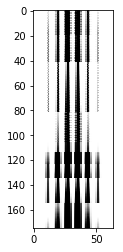

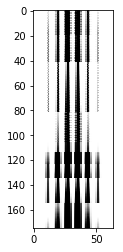

TypeError: Invalid dimensions for image data

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(datin, cmap='Greys')
plt.show()

datin.reshape(175,8,8,1)

plt.imshow(datin.reshape(175,8,8,1), cmap='Greys')
print(datin)
print(target)

In [4]:

from keras import models
from keras import layers

# Build a model
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(datin.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

model = build_model()
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [8]:

dataset = datin  #dataset 은 datin 인풋 사용
targets = target #targets 는 target 레이블 사용

print(dataset.shape)
print(targets.shape)

# Shuffle data and generate train/test data set
# 80% of dataset is used to train the model and
# the rest 20% is used to test
index = np.arange(len(dataset))   #인풋을 array 로 만들고
np.random.shuffle(index)    # 섞는다
print(index)

train_data = []   #공간생성
train_targ = []

test_data = []
test_targ = []

i = 0
ntrain = 0.8*len(dataset)

for itrg in index:                     # index의 0번째 array 부터 i가 ntrain(80%크기)보다 작다면 train_data에 append, itrg는 0부터 시작
  if i<ntrain:
    train_data.append(dataset[itrg])
    train_targ.append(targets[itrg])
  else:
    test_data.append(dataset[itrg])
    test_targ.append(targets[itrg])

  i += 1

train_data = np.array(train_data)
train_targ = np.array(train_targ)
print(train_data)
print(train_targ)

test_data = np.array(test_data)
test_targ = np.array(test_targ)
    
print("train data shape: ", train_data.shape)
print("train target shape: ", train_targ.shape)
print("test data shape: ", test_data.shape)
print("test target shape: ", test_targ.shape)

train_data = train_data.reshape((140,8,8,1))
print(train_data.shape)
plt.figure()
plt.imshow(train_data, cmap='Greys')
plt.show()

(175, 64)
(175,)
[  1  49  80 118  31  86 111 156   2  13 104  98  59 113  89  78 155  57
 145  29  14 173  42 162 134  35  94 106 168  26   9  73 159 129  54  20
  11  70  45  52  74  93 151  37 170  53  71 137  28 133 165   0  33 122
 147 150 140 139  47  99 115 109  66  68 125  72  38  69 149 160  67 120
 101 128 132   5 166  92 163 142  19  41 152  79 148  90 100  17  21  12
  58  24 103  22 136  39 112 154 143 121  81  97  48  55 171  60  34 107
  62   6  65  56  44 124 144   4  30 141 135  64 167  91 127  87  16 108
 138  51 164 146  32  83  27   3 114  50 123  96  82  46 105  77  84  15
  36 130 117 158  63 119 172  18   7  75 161  25 126  95  40  23  76   8
  88 116  61 102 174 131 153  10 110  43 157  85 169]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['2.3293419782992917' '0.5441058824320608' '1.737955085954755'
 '1.377063655253608' '1.8711725999801183' '2.75103257

TypeError: Invalid dimensions for image data

In [29]:
train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
import os
import tensorflow as tf
checkpoint_path = "ship/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # 다섯 번째 에포크마다 가중치를 저장합니다
    period=5)

# Fit the model
num_epochs = 400

history = model.fit(train_data, train_targ, epochs=num_epochs, batch_size=100,
                    callbacks = [cp_callback], 
                    validation_data = (test_data,test_targ),
                    verbose=0)

val_mse, val_mae = model.evaluate(test_data, test_targ)

print("MSE: ", val_mse)
print("MAE: ", val_mae)

Instructions for updating:
Use tf.cast instead.


AttributeError: 'ModelCheckpoint' object has no attribute 'on_test_begin'

In [6]:

# Evaluate the model fitting

import pandas as pd

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,epoch
395,0.005619,0.055545,395
396,0.005198,0.049239,396
397,0.005207,0.051892,397
398,0.005554,0.054403,398
399,0.005519,0.055030,399


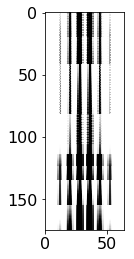

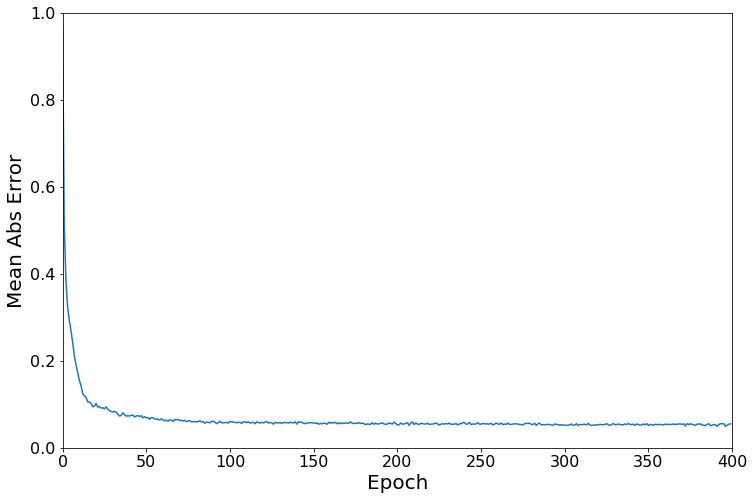

In [19]:

import matplotlib.pyplot as plt
plt.imshow(datin, cmap='Greys')


def plot_hist(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(12,8))
  
  plt.xlabel('Epoch', fontsize=20)
  plt.ylabel('Mean Abs Error', fontsize=20)
  plt.plot(hist['epoch'], hist['mean_absolute_error'])
  
  plt.rc('xtick', labelsize=16)
  plt.rc('ytick', labelsize=16)
  
  plt.xlim([0,num_epochs])
  plt.ylim([0,1])
  
  plt.show()

plot_hist(history)

In [20]:

# Evaluate the model
i = 0

predicted = model.predict(test_data)

cfd_data = []
cd_pred = []

for e in test_targ:
  cfd_data.append(float(e))

for e in predicted:
  cd_pred.append(float(e))
  
diffList = []
errList = []

sum_err2 = 0.0
sum_dif2 = 0.0
count = 0

def sqr(s):
  return s*s

for i in range(0, len(cd_pred)):
  diff = float(test_targ[i]) - float(cd_pred[i])
  err = diff/float(test_targ[i])
  
  diffList.append(diff)
  errList.append(err)
  
  print(i, test_targ[i], cd_pred[i], diff, err)
  
  sum_err2 += sqr(err)
  sum_dif2 += sqr(diff)
  count += 1

def mag(li):
  lo = li
  for i in range(0, len(li)):
    lo[i] = np.sqrt(li[i]*li[i])
   
  return lo

rms_err = np.sqrt(sum_err2/count)
rms_dif = np.sqrt(sum_dif2/count)

print('-----\n')
print('Diff. min/max/rms', np.min(mag(diffList)), '/', np.max(mag(diffList)), '/', rms_dif)
print('Err.  min/max/rms', np.min(mag(errList)), '/', np.max(mag(errList)), '/', rms_err)

0 0.7948127292883755 0.7788097262382507 0.01600300305012481 0.020134306435244026
1 1.5509245899163873 1.6188839673995972 -0.0679593774832099 -0.0438186214372123
2 1.3627592476562012 1.3263272047042847 0.03643204295191649 0.026734027315958905
3 1.0196065859919836 1.034259557723999 -0.014652971732015407 -0.014371201533343776
4 2.5684260840636495 2.6218338012695312 -0.05340771720588178 -0.02079394752189343
5 2.0080871890730356 2.029568672180176 -0.021481483107140154 -0.010697485260615772
6 0.7385475715761002 0.730587363243103 0.007960208332997154 0.010778193090540724
7 2.430494542443493 2.413597583770752 0.016896958672741214 0.00695206608271331
8 1.73780627970209 1.6784759759902954 0.059330303711794485 0.03414091916042875
9 0.2126918943935795 0.2064192295074463 0.006272664886133206 0.029491790949615793
10 2.3842426141105566 2.426215648651123 -0.041973034540566445 -0.017604347096289323
11 0.20533106175896057 0.1795526146888733 0.02577844707008728 0.12554577397719183
12 2.489585654212682 2.

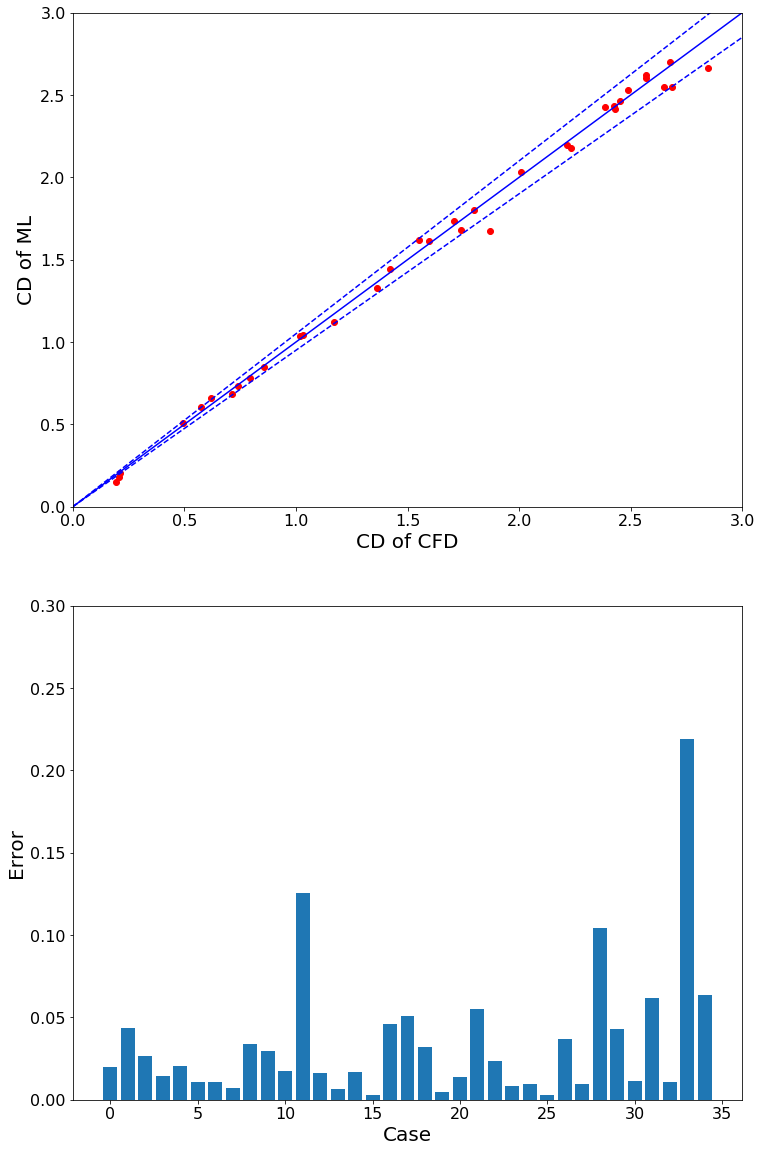

In [21]:
def plot_eval(x, y):
  plt.rcParams["figure.figsize"] = (12, 20)
  #plt.subplots_adjust(wspace=0.3)
  
  plt.subplot(2,1,1)
  plt.scatter(x, y, c='r')
  plt.plot([0,3], [0,3], 'b')
  plt.plot([0,3], [0,2.85], 'b--')
  plt.plot([0,3], [0,3.15], 'b--')
  
  plt.xlabel('CD of CFD', fontsize=20)
  plt.ylabel('CD of ML', fontsize=20)
  
  plt.xlim([0, 3])
  plt.ylim([0, 3])
  
  plt.subplot(2,1,2)
  plt.bar(range(len(errList)), errList)
  plt.xlabel('Case', fontsize=20)
  plt.ylabel('Error', fontsize=20)
  plt.ylim([0,0.3])
  
  plt.show()

plot_eval(cfd_data, cd_pred)